# Pulsar dataset analysis

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

### Load Data

In [3]:
data = pd.read_csv("/home/jan/Ironhack/week-8-project/predicting-a-pulsar-star/pulsar_stars.csv")

### Inspect Data

In [4]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Data is imbalanced:

In [5]:
data.target_class.value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

In [6]:
data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [7]:
data.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

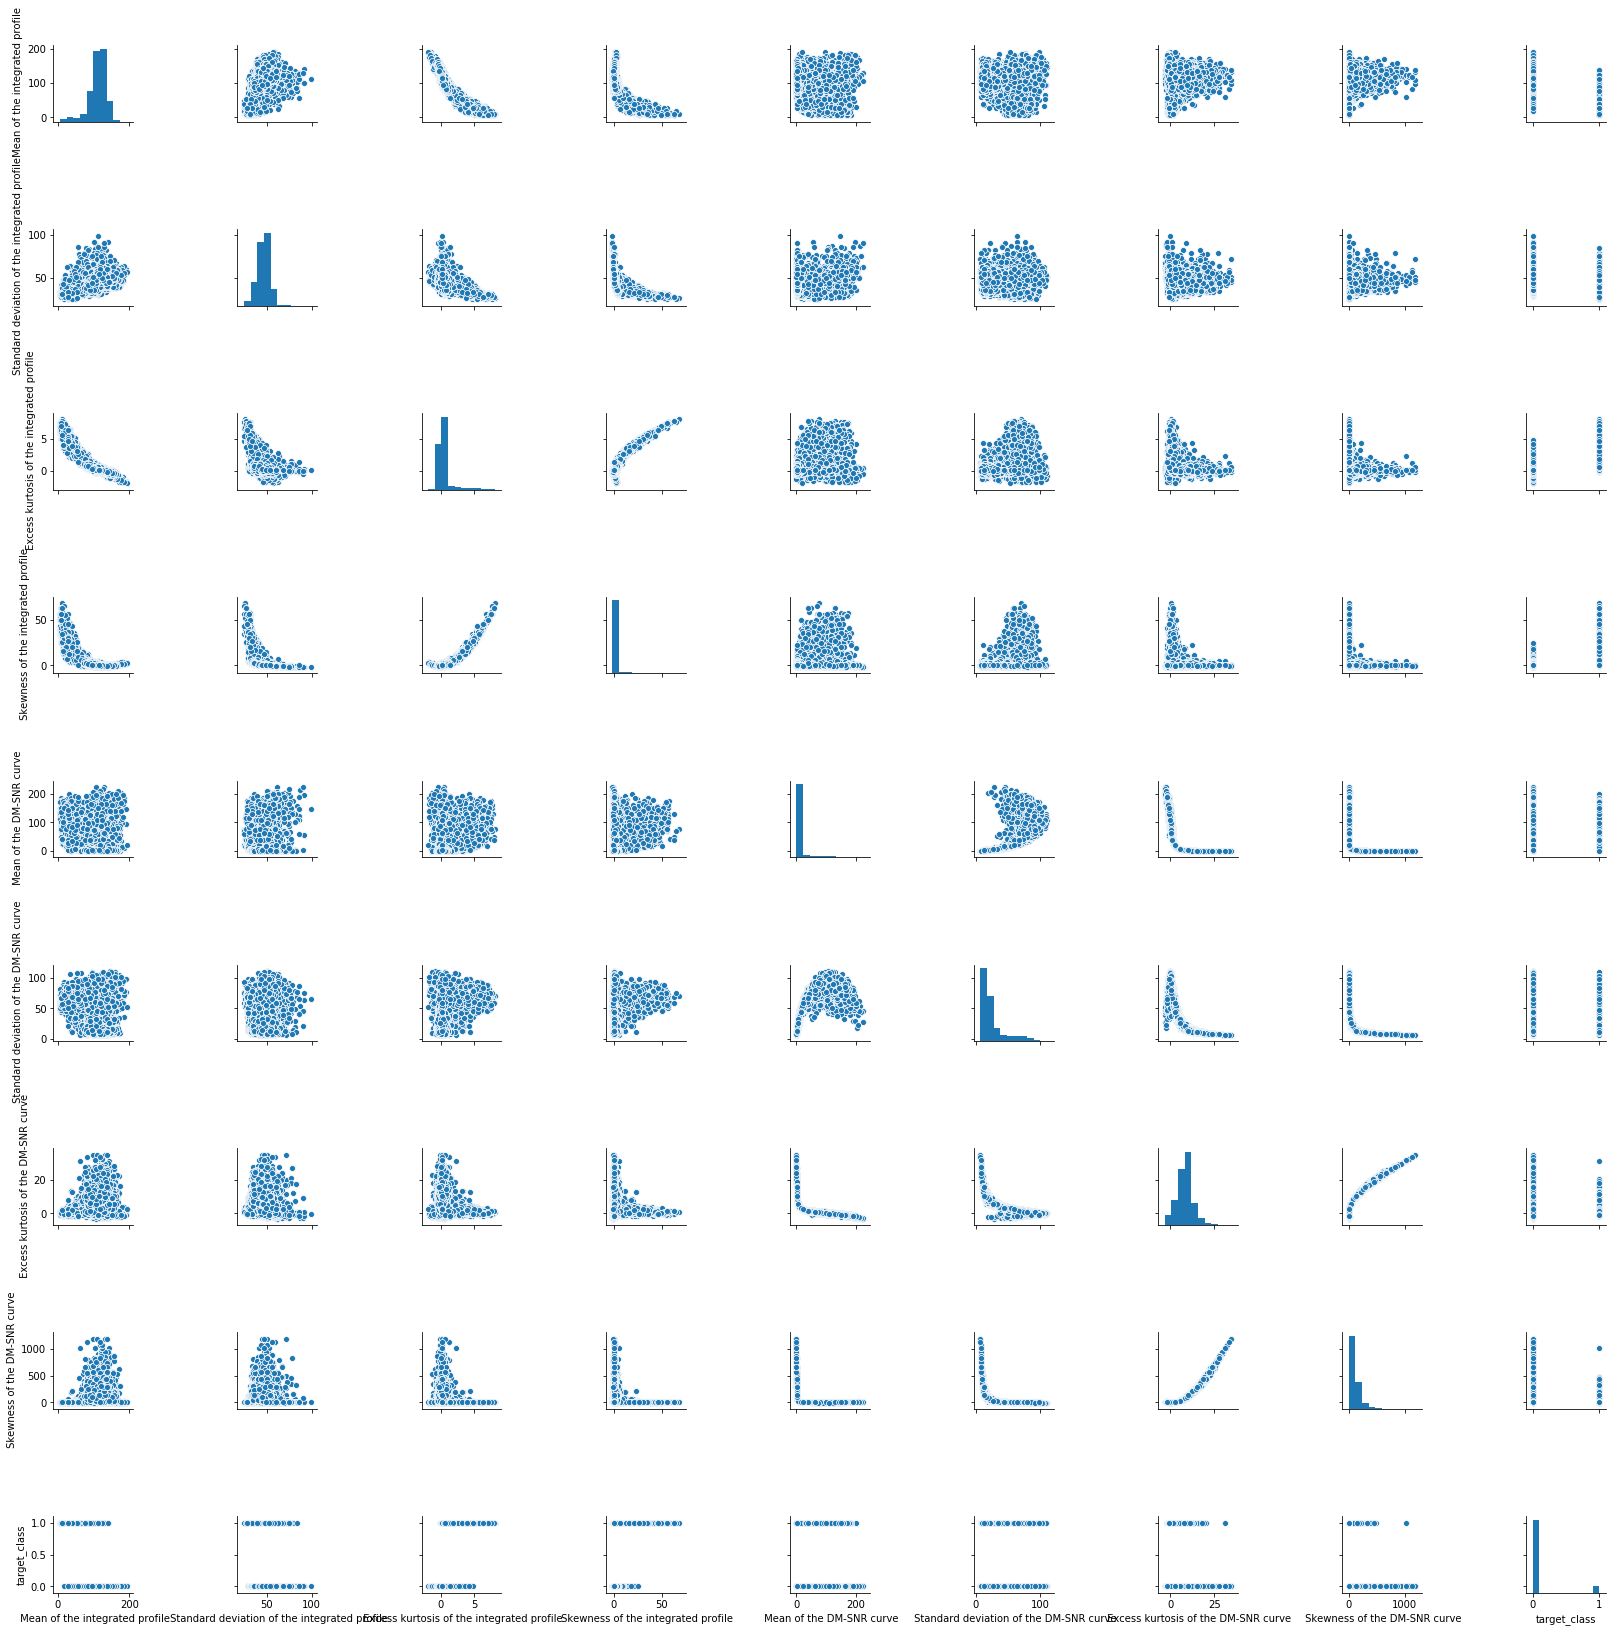

In [8]:
sns.pairplot(data)

The above inspection of data showed that no cleaning is needed.

## Beginning ML analysis

### Split and define train and test data

In [38]:
X = data.drop(columns='target_class', axis = 1)
y = data['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

#### Trying out different models 

In [10]:
regr = LinearRegression()

lin_model = regr.fit(X_train,y_train)
lin_model.score(X_test, y_test)

0.6825990561665036

In [11]:
# whoops... I meant logical

In the end of my analysis I realized I had used Linear regression by mistake. Then I added the correct logical regression.

In [12]:
lr = LogisticRegression() # Initialize
lr_model = lr.fit(X_train,y_train)   # Fit model to training set

lr_model.score(X_test, y_test)

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9804469273743017

In [13]:
cv_results = cross_val_score(lr, X, y, cv=5) 
cv_results

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

array([0.97458101, 0.97960894, 0.98072626, 0.97765363, 0.97792063])

In [41]:
dt = DecisionTreeClassifier(random_state = 29)

dt_model = dt.fit(X_train,y_train)
dt_model.score(X_test, y_test)

0.9659217877094972

In [42]:
cv_results = cross_val_score(dt, X, y, cv=5) 
cv_results

array([0.96648045, 0.96480447, 0.96620112, 0.96592179, 0.96841811])

In [43]:
param_grid = {'n_neighbors': np.arange(1,50)} 
knn = neighbors.KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)
knn_cv.best_params_

{'n_neighbors': 12}

In [44]:
knnc = neighbors.KNeighborsClassifier(n_neighbors = 12)

knnc_model = knnc.fit(X_train, y_train)
knnc_model.score(X_test, y_test)

0.9731843575418995

In [18]:
cv_results = cross_val_score(knnc, X, y, cv=5) 
cv_results

array([0.96955307, 0.97122905, 0.97681564, 0.97150838, 0.97372834])

## Trying whether balancing data set may  positively affect accuracy

In [19]:
# Shuffle the Dataset.
shuffled_df = data.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
pulsars = shuffled_df.loc[shuffled_df['target_class'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_pulsars = shuffled_df.loc[shuffled_df['target_class'] == 0].sample(n=1650,random_state=29)

# Concatenate both dataframes again
balanced = pd.concat([pulsars, non_pulsars])
balanced = balanced.sample(frac=1,random_state=4)

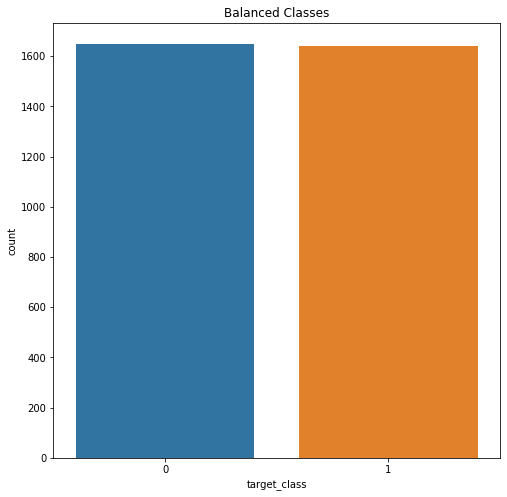

In [20]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('target_class', data=balanced)
plt.title('Balanced Classes')
plt.show()

#### The new pairplot looks better but the data still doesn't show clear cut in two groups:

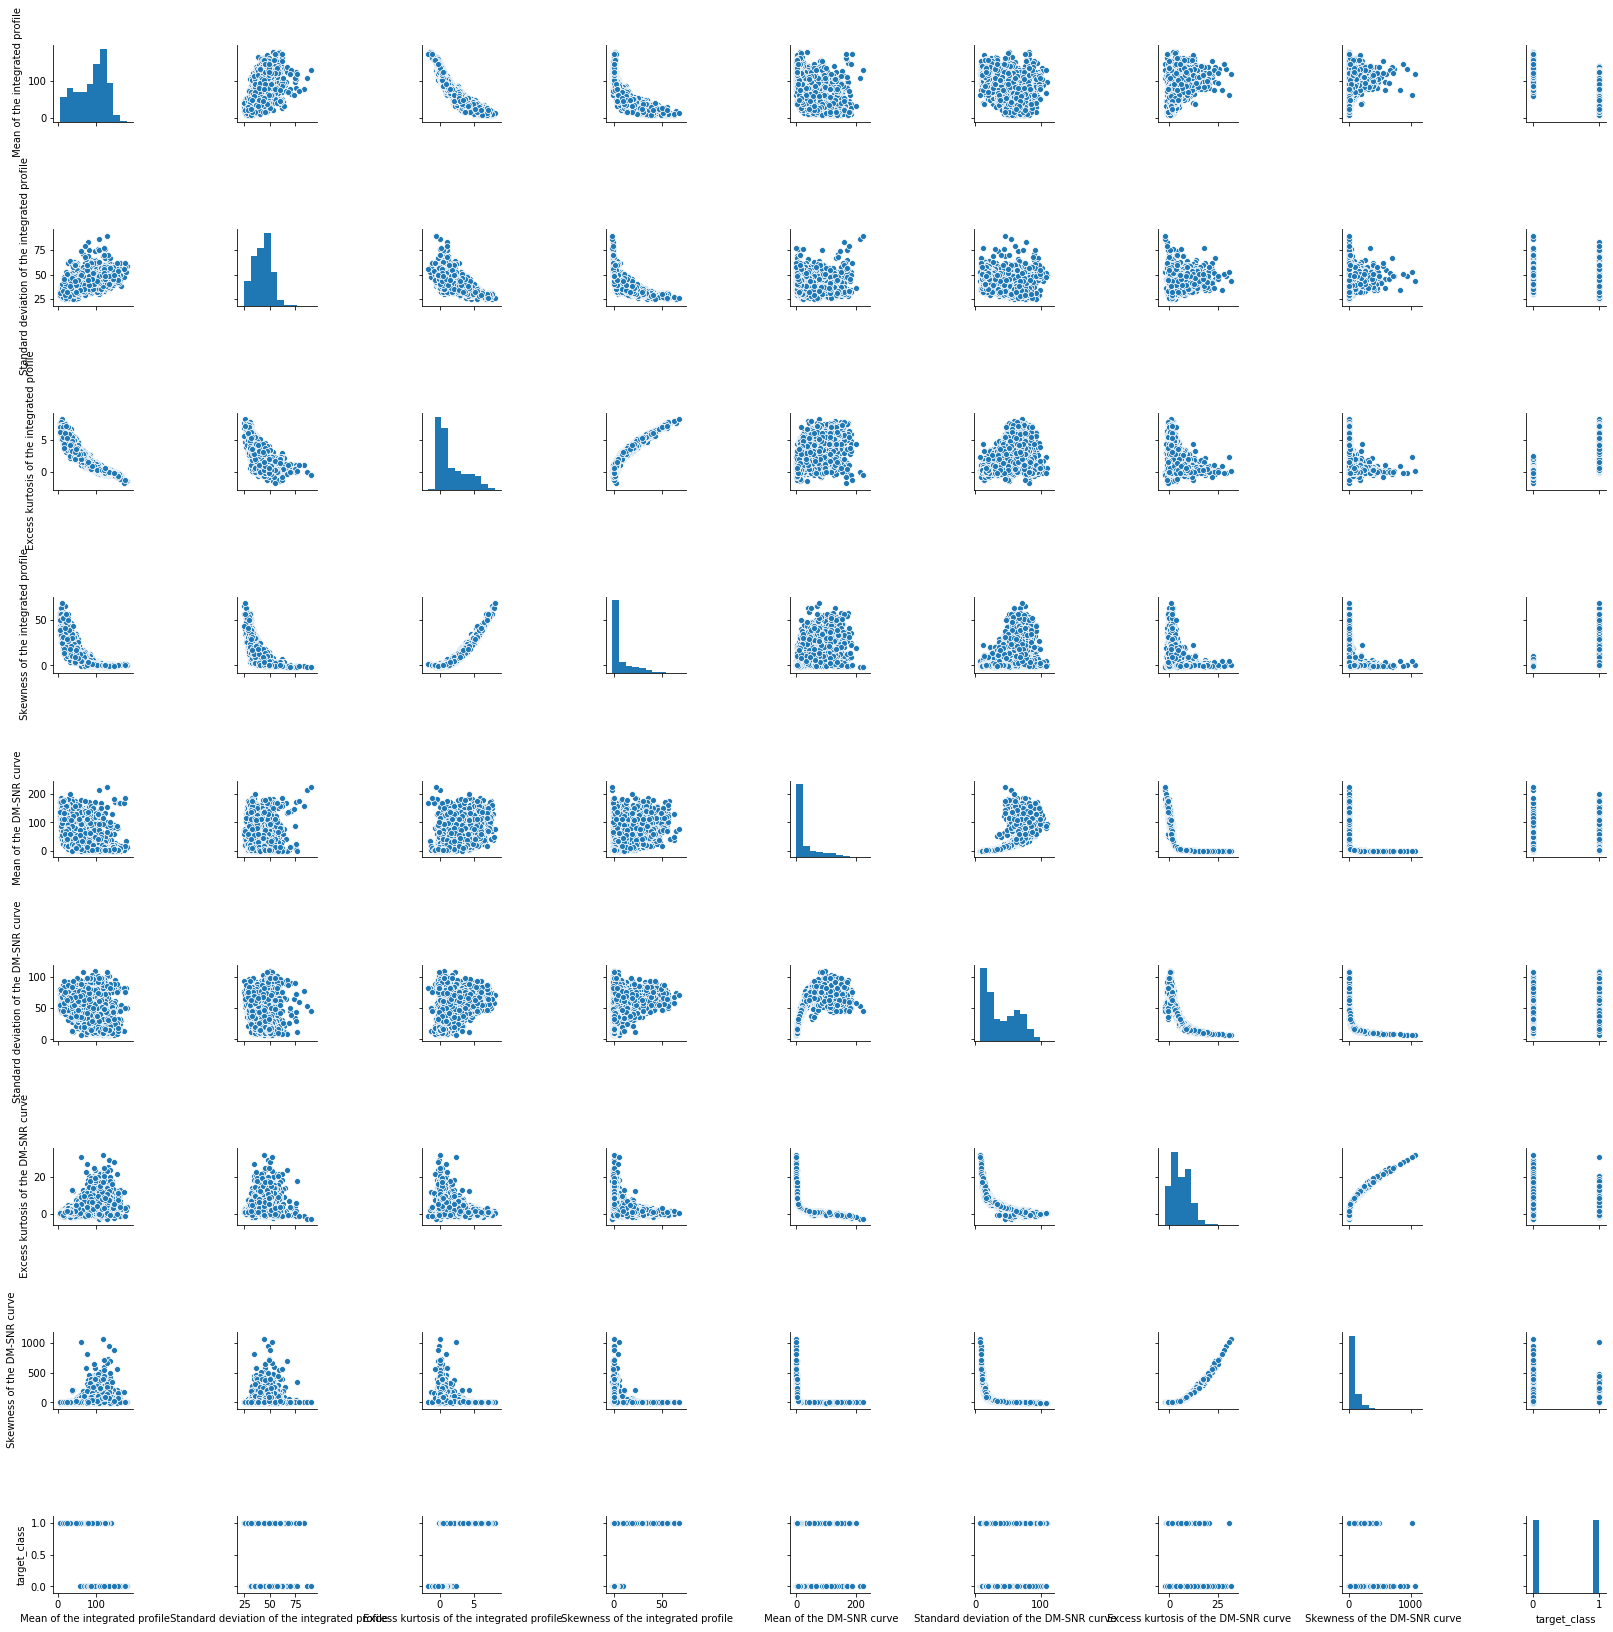

In [21]:
sns.pairplot(balanced)

## Redoing analysis and adding validation

In [45]:
X = balanced.drop(columns='target_class', axis = 1)
y = balanced['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [23]:
regr = LinearRegression()

lin_model = regr.fit(X_train,y_train)
lin_model.score(X_test, y_test)

0.7061563495949437

In [24]:
cv_results = cross_val_score(regr, X, y, cv=5) 
cv_results

array([0.71879784, 0.71804721, 0.76932395, 0.69412333, 0.7162553 ])

In [25]:
ls = linear_model.Lasso(alpha=0.1)
ls.fit(X_train, y_train)
ls.score(X_test, y_test)

0.655197894506468

In [26]:
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline (PolynomialFeatures(3), LinearRegression())
model = poly_model.fit(X,y)

poly_model.score(X_test, y_test)

0.8105458498974805

In [27]:
cv_results = cross_val_score(poly_model, X, y, cv=5) 
cv_results

array([0.7956767 , 0.75109003, 0.77980523, 0.7281564 , 0.14483973])

In [28]:
lr = LogisticRegression() # Initialize
lr_model = lr.fit(X_train,y_train)   # Fit model to training set

lr_model.score(X_test, y_test)

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9376899696048632

In [29]:
cv_results = cross_val_score(lr, X, y, cv=5) 
cv_results

/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

array([0.943769  , 0.94072948, 0.95592705, 0.93465046, 0.94063927])

In [46]:
dt = DecisionTreeClassifier(random_state = 29)

dt_model = dt.fit(X_train,y_train)
dt_model.score(X_test, y_test)

0.9057750759878419

In [47]:
cv_results = cross_val_score(dt, X, y, cv=5) 
cv_results

array([0.90425532, 0.91337386, 0.90881459, 0.89513678, 0.91171994])

In [32]:
knnc = neighbors.KNeighborsClassifier(n_neighbors = 19)

knnc_model = knnc.fit(X_train, y_train)
knnc_model.score(X_test, y_test)

0.9148936170212766

In [33]:
cv_results = cross_val_score(knnc, X, y, cv=5) 
cv_results

array([0.93009119, 0.91489362, 0.94528875, 0.89969605, 0.91324201])

In [34]:
knnr = KNeighborsRegressor(n_neighbors = 30)

knn_model = knnr.fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.7147423831814076

In [35]:
cv_results = cross_val_score(knnr, X, y, cv=5) 
cv_results

array([0.75258641, 0.72457014, 0.80931064, 0.67242367, 0.72619079])

In [36]:
param_grid = {'n_neighbors': np.arange(1,50)} 
knn = neighbors.KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)
knn_cv.best_params_

{'n_neighbors': 19}

For the regressors - tested first out of mistake then out of curiosity - the balanced data set gets higher accuracy but for the classifiers the accuracy gets much lower.

#### Therefore, balancing the data set didn't improve the outcome of the analysis.